In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from google.colab import drive
drive.mount ('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Dataset/SalaryData_cleaned.csv', encoding = 'latin1')

In [58]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),Job Description,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,0,0,0,0,0,data scientist,na,15,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),Job Description,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,42,0,0,0,0,0,data scientist,na,15,0
2,Data Scientist,$80K-$90K (Glassdoor est.),Job Description,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,16,0,0,0,0,0,data scientist,na,15,0
3,Data Scientist,$56K-$97K (Glassdoor est.),Job Description,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,61,0,0,0,0,0,data scientist,na,15,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Job Description,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,28,0,0,0,0,0,data scientist,na,15,3


In [59]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python_yn', 'r_studio_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [60]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [61]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

,count
job_simp,
data scientist,279
na,184
data engineer,119
analyst,102
manager,22
mle,22
director,14


In [62]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

,count
seniority,
na,519
senior,220
junior,3


In [63]:
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

,count
job_state,
CA,152
MA,103
NY,72
VA,41
IL,40
MD,35
PA,33
TX,28
WA,21


In [13]:
df['desc_len'] = df['Job Description'].str.len()
df['desc_len']

,desc_len
0,15
1,15
2,15
3,15
4,15
...,...
737,15
738,15
739,15
740,15


In [14]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [15]:
df['num_comp']

,num_comp
0,0
1,0
2,0
3,3
4,3
...,...
737,3
738,3
739,0
740,0


In [64]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [65]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,68,96
177,1,84,136
197,1,72,100
202,1,84,136
210,1,60,100
246,1,68,96
271,1,84,136
337,1,72,100
345,1,96,156
357,1,84,136


In [66]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-3], axis=1)

In [67]:
df['company_txt']

,company_txt
0,Tecolote Research\n
1,University of Maryland Medical System\n
2,KnowBe4\n
3,PNNL\n
4,Affinity Solutions\n
...,...
737,GSK\n
738,Eventbrite\n
739,Software Engineering Institute\n
740,"Numeric, LLC\n"


In [68]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,r_studio_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.0,742.0,742.0,742.0,742.0,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,76.021563,130.082210,100.626011,52.187332,0.0,0.0,0.0,0.0,0.0,15.0,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.459851,43.715958,38.855948,54.156829,0.0,0.0,0.0,0.0,0.0,0.0,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,-1.000000,0.0,0.0,0.0,0.0,0.0,15.0,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,54.000000,99.000000,73.500000,17.000000,0.0,0.0,0.0,0.0,0.0,15.0,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,72.000000,125.500000,97.500000,30.000000,0.0,0.0,0.0,0.0,0.0,15.0,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,93.000000,156.000000,122.500000,65.000000,0.0,0.0,0.0,0.0,0.0,15.0,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,282.000000,0.0,0.0,0.0,0.0,0.0,15.0,4.000000


In [21]:
feature_small = []
feature_large = []

for feature in df.columns:
  len_feature = df[feature].nunique()

  if (len_feature <= 10 ):
    feature_small.append([feature, len_feature])
  else:
    feature_large.append([feature, len_feature])

print('----Feature small----')
for item in feature_small:
  print(item)

print('\n-----Feature large------')
for item in feature_large:
  print(item)

----Feature small----
['Job Description', 1]
['Size', 9]
['hourly', 2]
['employer_provided', 2]
['python_yn', 1]
['r_studio_yn', 1]
['spark_yn', 1]
['aws_yn', 1]
['excel_yn', 1]
['job_simp', 7]
['seniority', 3]
['desc_len', 1]
['num_comp', 5]

-----Feature large------
['Job Title', 264]
['Salary Estimate', 416]
['Rating', 31]
['Company Name', 343]
['Location', 200]
['Headquarters', 198]
['Founded', 102]
['Type of ownership', 11]
['Industry', 60]
['Sector', 25]
['Revenue', 14]
['Competitors', 128]
['min_salary', 114]
['max_salary', 160]
['avg_salary', 225]
['company_txt', 343]
['job_state', 37]
['age', 102]


# **Univariate Analysis**

<Axes: >

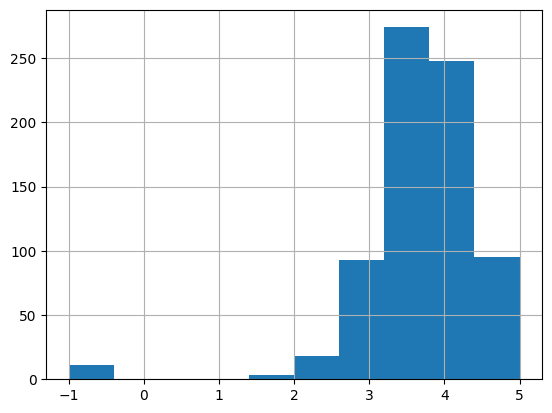

In [71]:
df.Rating.hist()

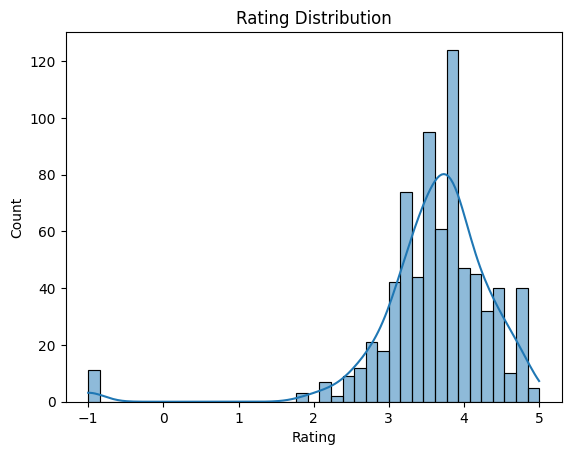

In [77]:
plt.title("Rating Distribution")
sns.histplot(df.Rating, kde=True)
plt.show()

In [75]:
print(df.Rating.skew())
print(df.Rating.kurt())

-2.8140195537269257
14.304127243645665


<Axes: >

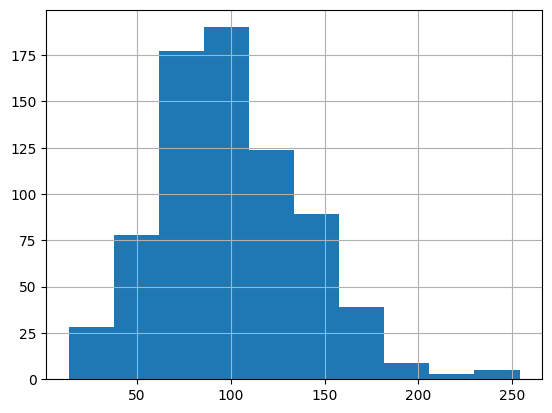

In [53]:
df.avg_salary.hist()

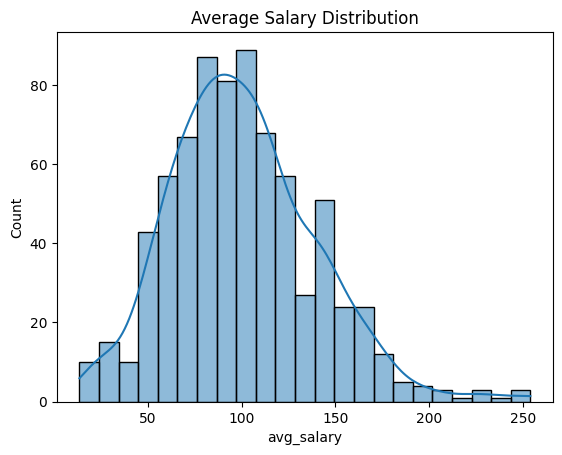

In [79]:
plt.title("Average Salary Distribution")
sns.histplot(df.avg_salary, kde=True)
plt.show()

In [80]:
print(df.avg_salary.skew())
print(df.avg_salary.kurt())

0.6094736592509536
0.8891961858304711


<Axes: >

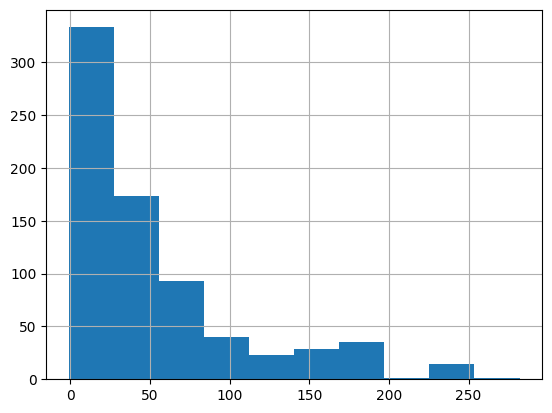

In [28]:
df.age.hist()

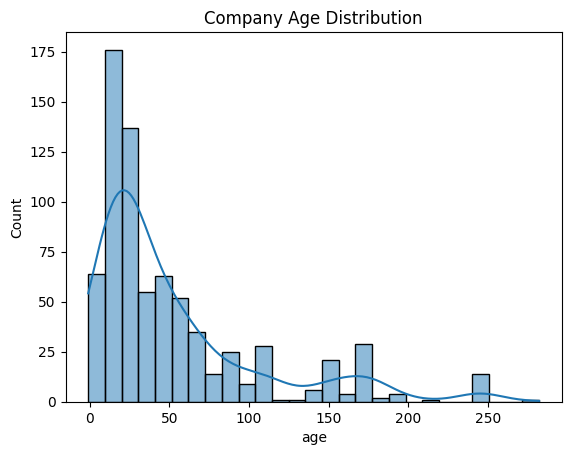

In [84]:
plt.title("Company Age Distribution")
sns.histplot(df.age, kde=True)
plt.show()

In [82]:
print(df.age.skew())
print(df.age.kurt())

1.7522774062293147
2.707712757711049


Job Description


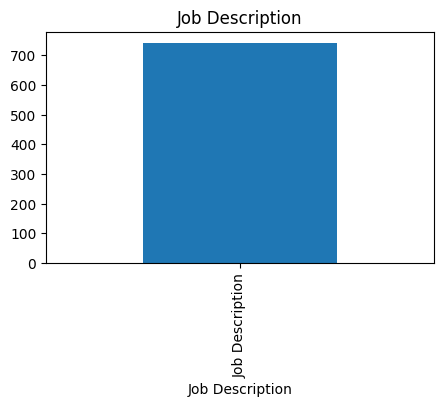

Size


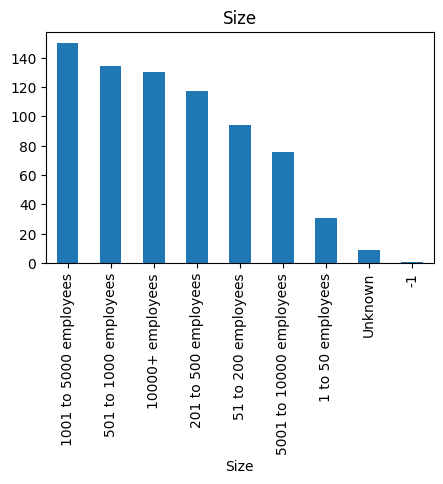

hourly


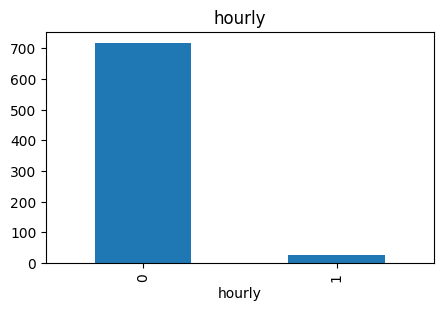

employer_provided


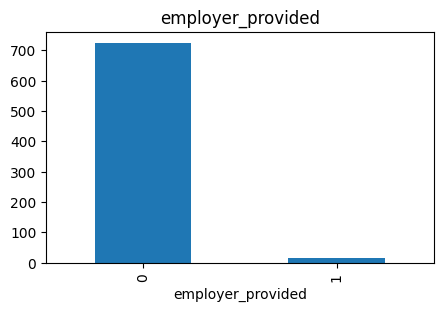

python_yn


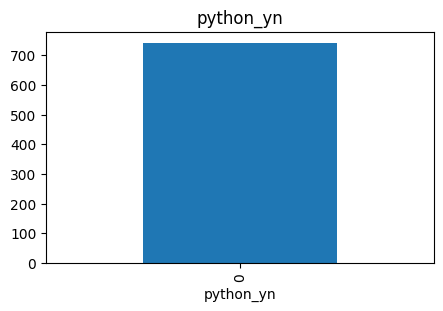

r_studio_yn


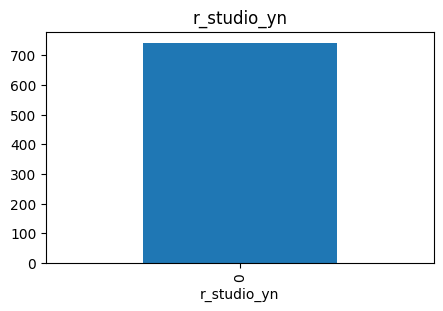

spark_yn


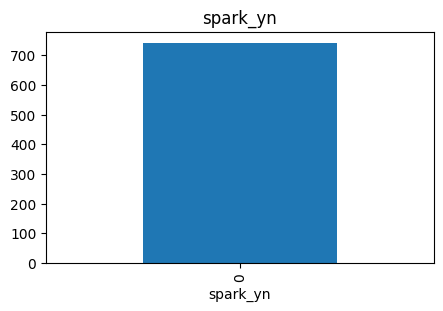

aws_yn


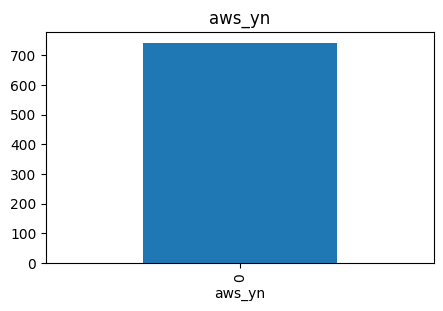

excel_yn


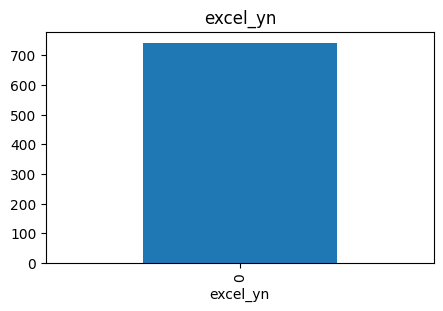

job_simp


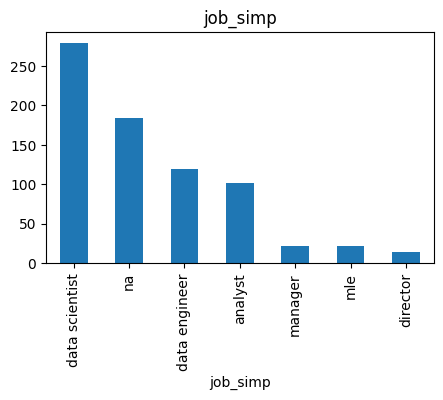

seniority


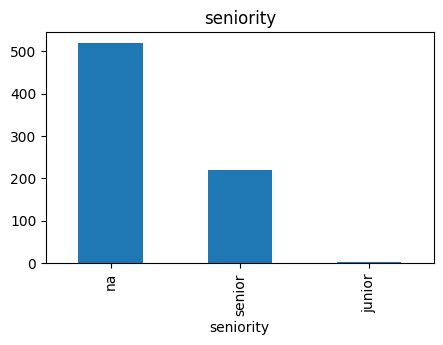

desc_len


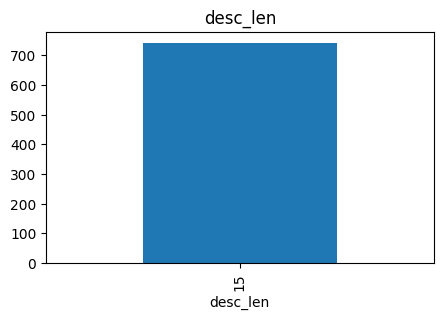

num_comp


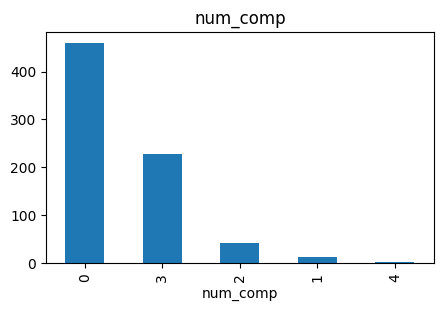

In [69]:
for item in feature_small:
  column_name = item[0]
  print(column_name)

  df[column_name].value_counts().plot(kind='bar',figsize=(5,3),title=column_name)
  plt.show()

Job Title


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


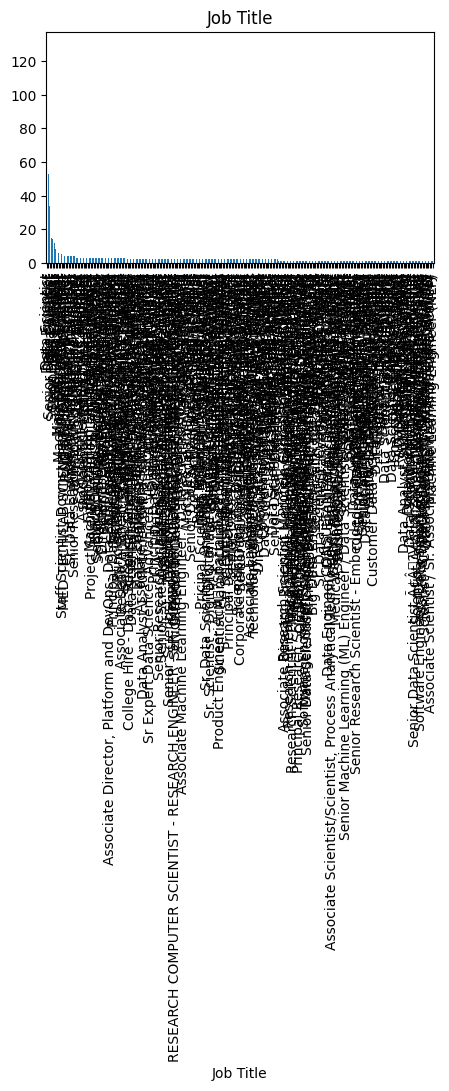

Salary Estimate


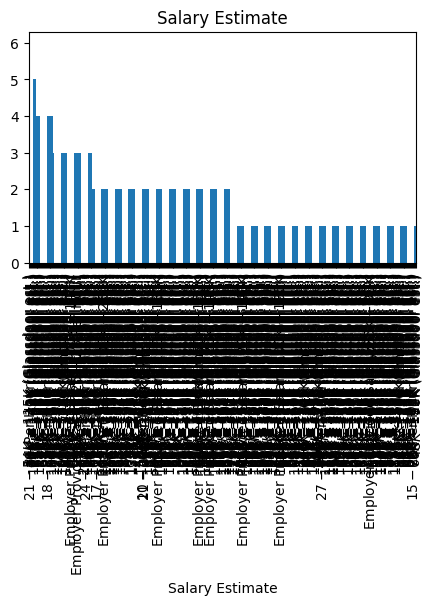

Rating


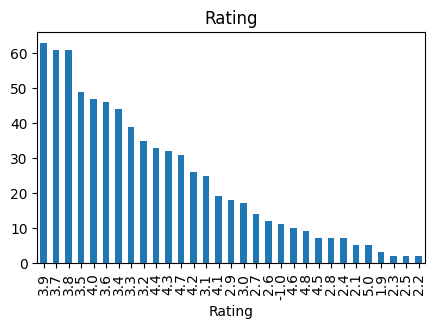

Company Name


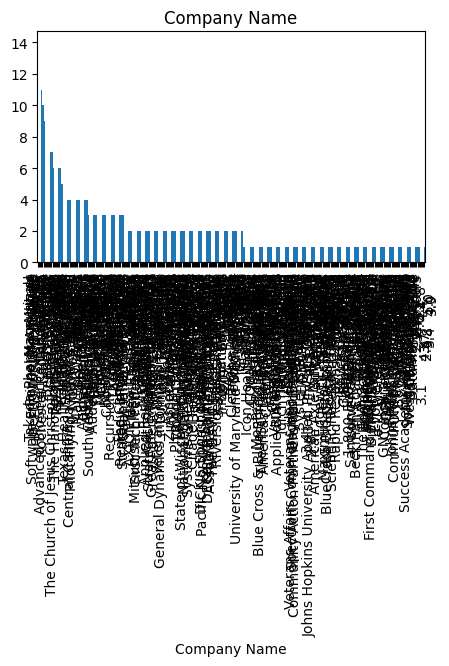

Location


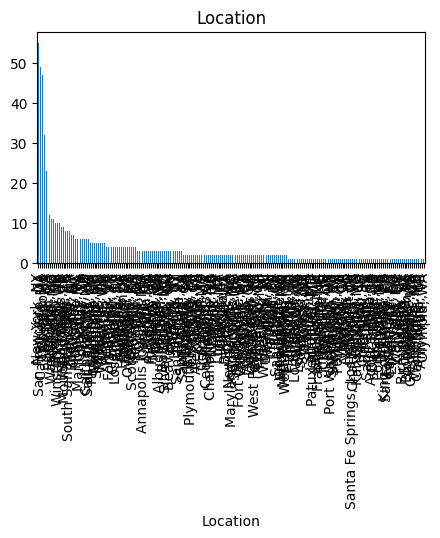

Headquarters


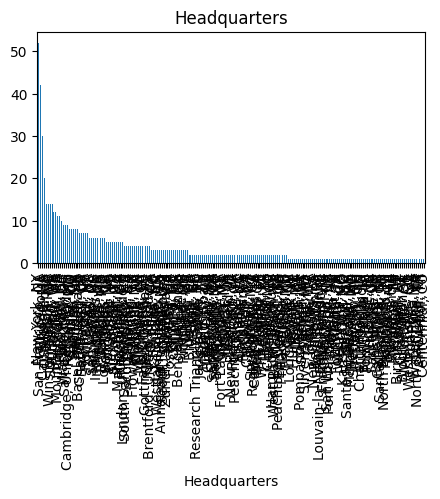

Founded


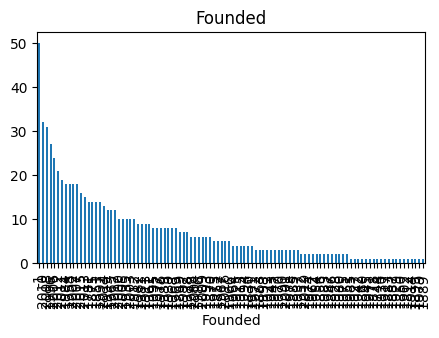

Type of ownership


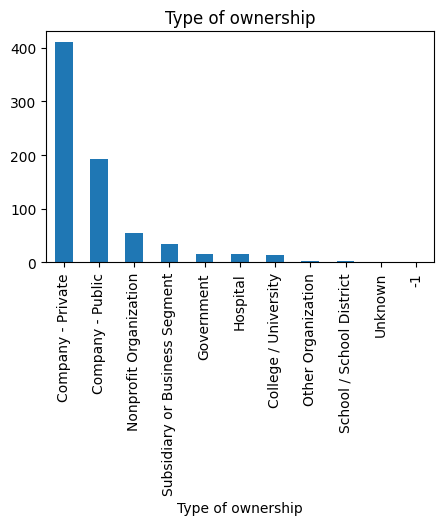

Industry


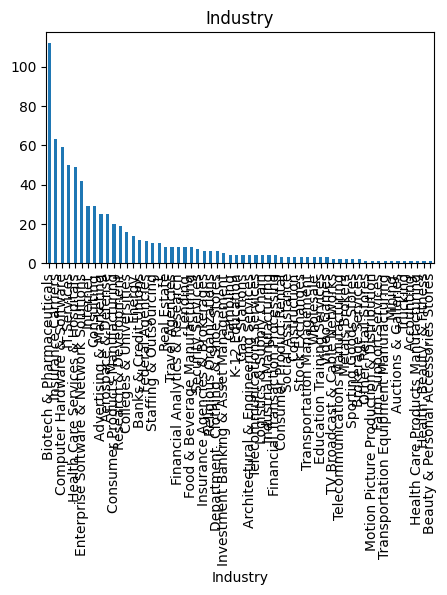

Sector


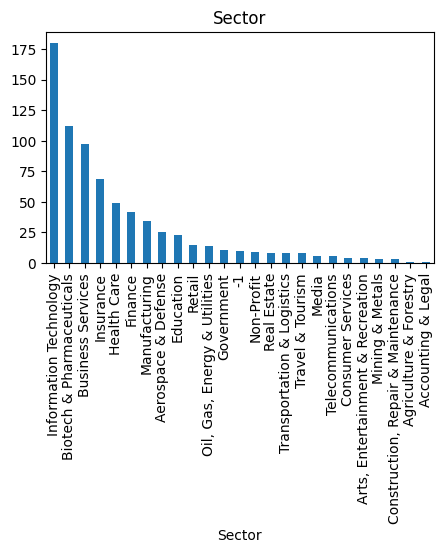

Revenue


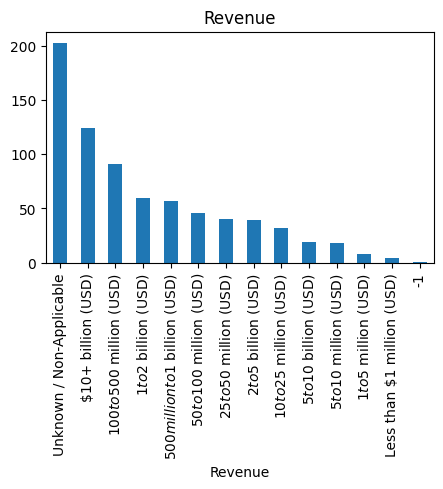

Competitors


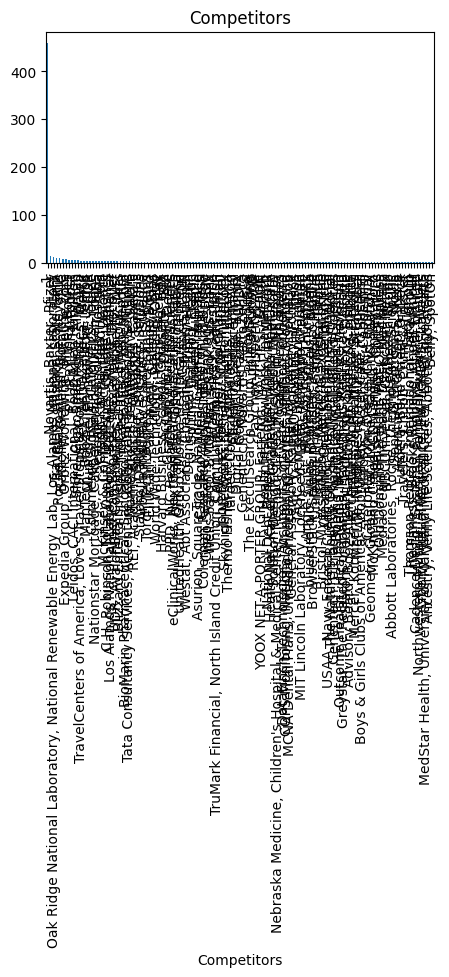

min_salary


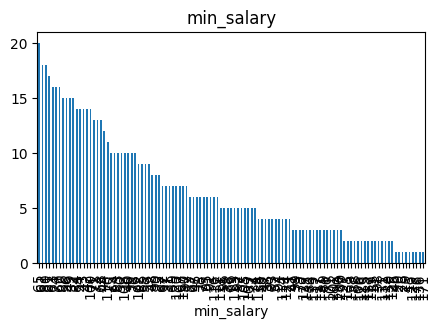

max_salary


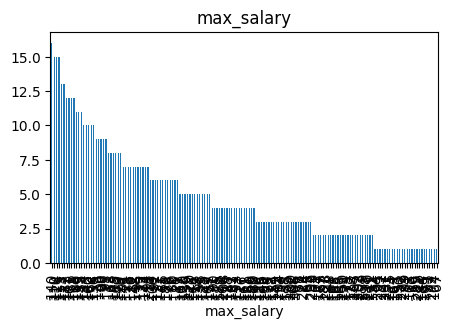

avg_salary


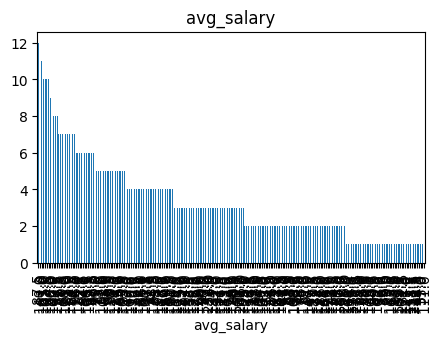

company_txt


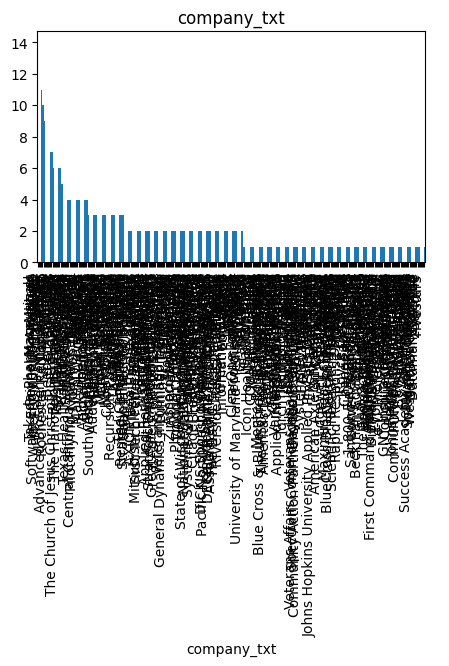

job_state


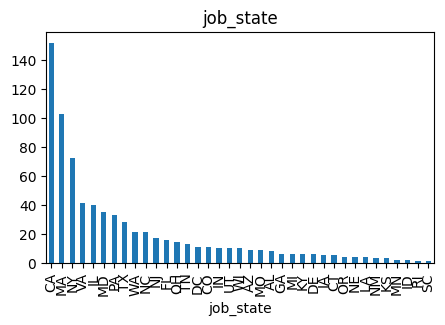

age


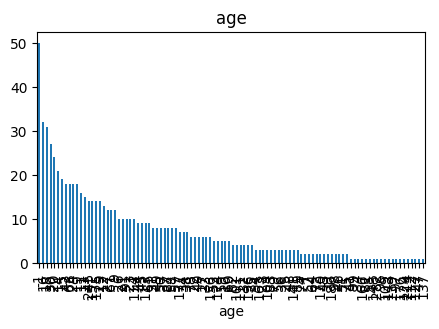

In [70]:
for item in feature_large:
  column_name = item[0]
  print(column_name)

  df[column_name].value_counts().plot(kind='bar',figsize=(5,3),title=column_name)
  plt.show()

<Axes: >

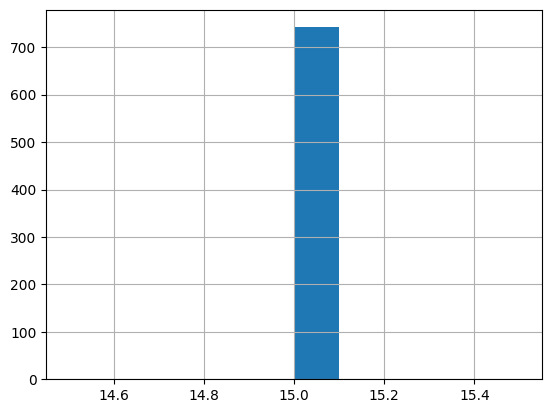

In [30]:
df.desc_len.hist()

In [86]:
print(feature_small)

[['Job Description', 1], ['Size', 9], ['hourly', 2], ['employer_provided', 2], ['python_yn', 1], ['r_studio_yn', 1], ['spark_yn', 1], ['aws_yn', 1], ['excel_yn', 1], ['job_simp', 7], ['seniority', 3], ['desc_len', 1], ['num_comp', 5]]


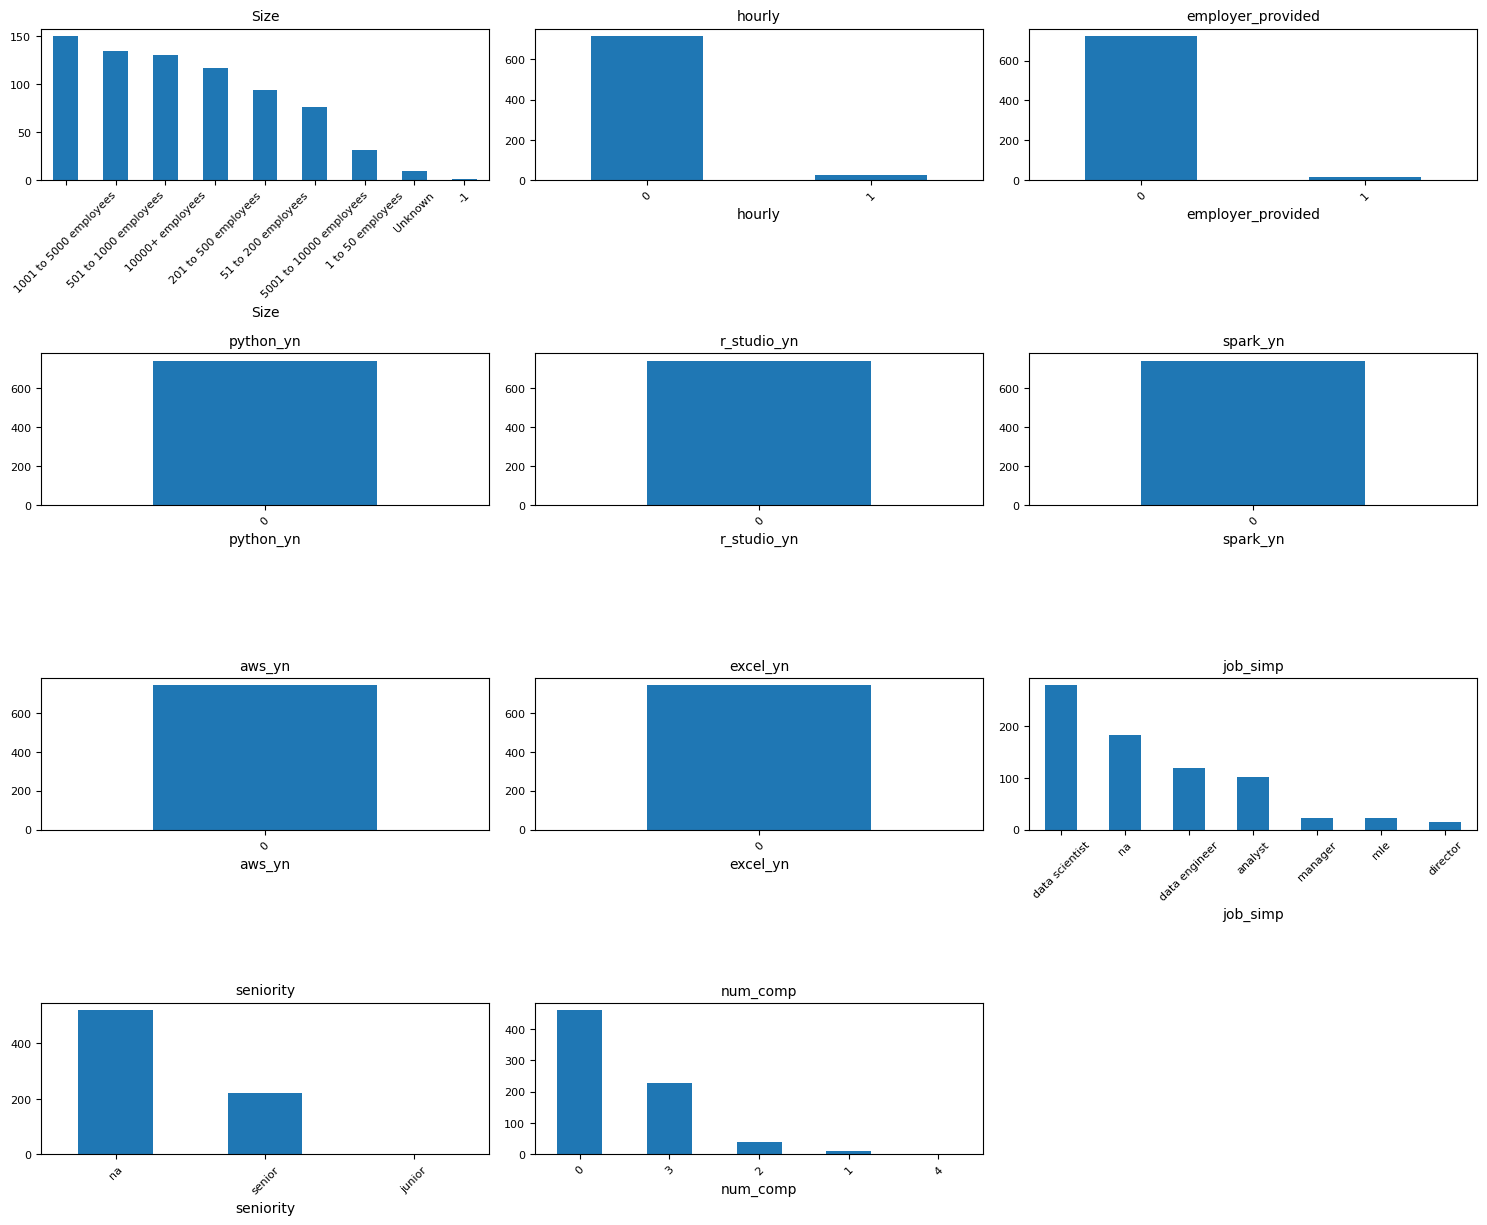

In [88]:
feature_small_filtered = [item for item in feature_small if item[0] not in ['Job Description', 'desc_len']]

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for k, item in enumerate(feature_small_filtered):
  column_name = item[0]
  df[column_name].value_counts().plot(
      kind='bar', ax=axes[k], fontsize=8, rot=45
  )
  axes[k].set_title(column_name, fontsize=10)

# Hide any unused subplots
for i in range(len(feature_small_filtered), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

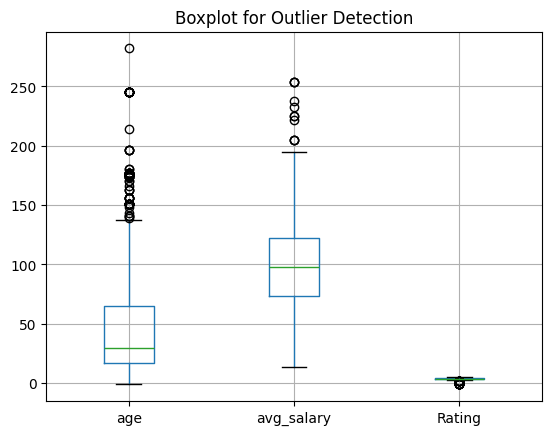

In [33]:
df.boxplot(column = ['age', 'avg_salary', 'Rating'])
plt.title("Boxplot for Outlier Detection")
plt.show()

<Axes: >

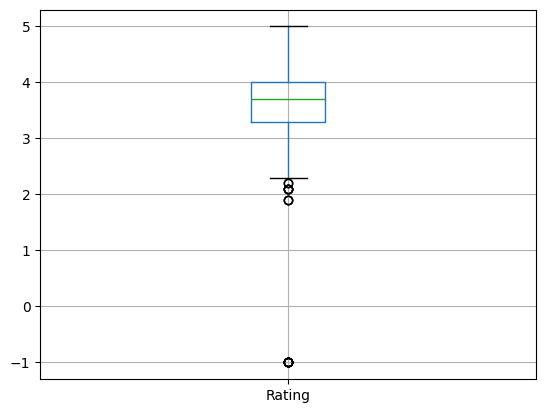

In [34]:
df.boxplot(column = 'Rating')

In [47]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019163,0.030637,NaN
avg_salary,0.019163,1.000000,0.013492,NaN
Rating,0.030637,0.013492,1.000000,NaN
desc_len,NaN,NaN,NaN,NaN


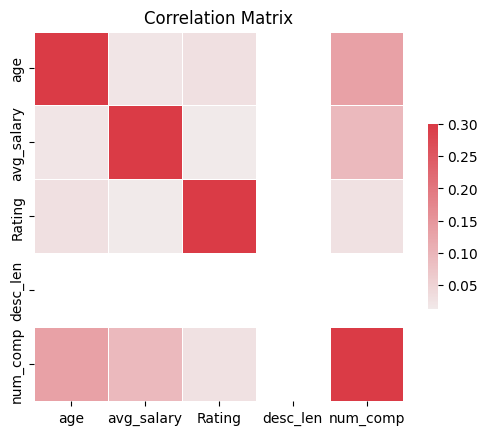

In [38]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")
plt.show()

In [99]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state']]

graph for Location: total = 200


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


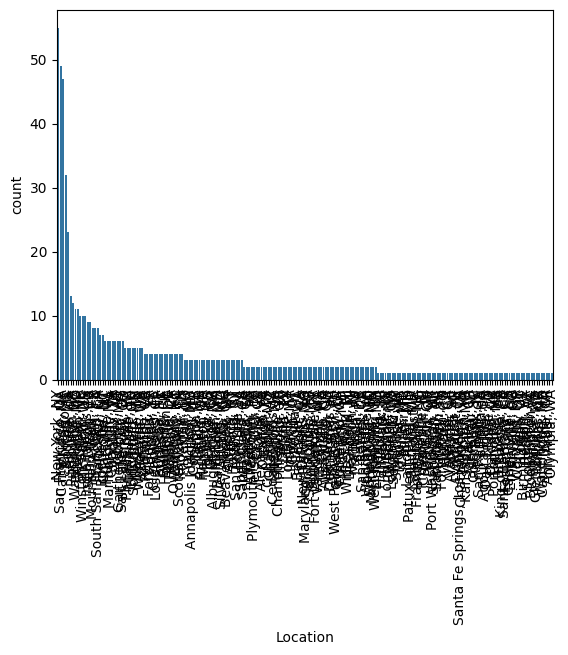

graph for Headquarters: total = 198


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


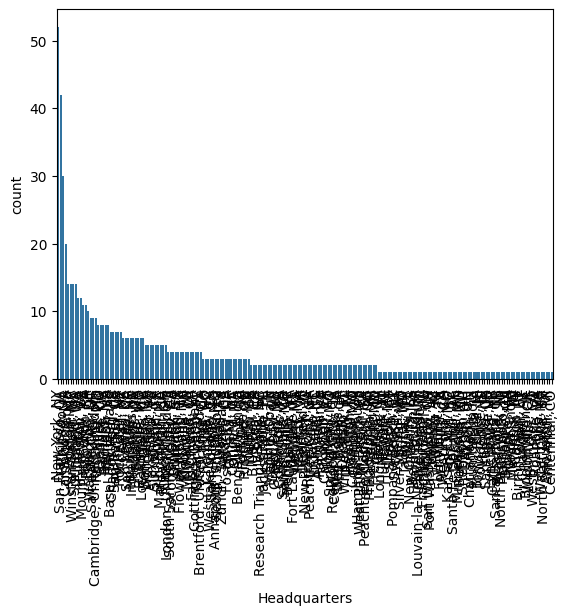

graph for Size: total = 9


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


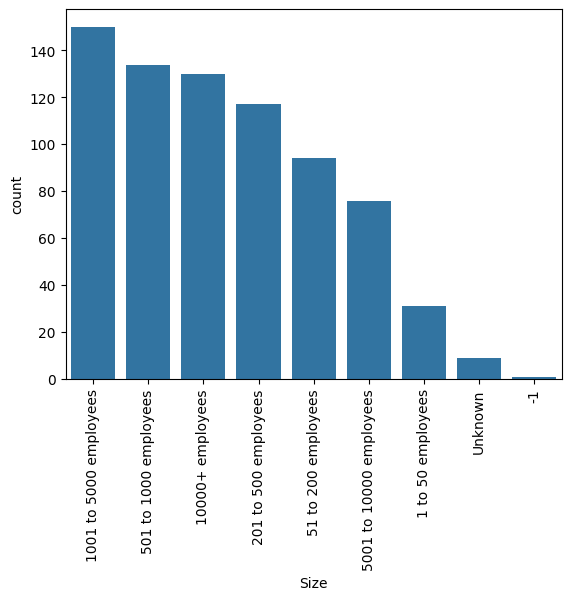

graph for Type of ownership: total = 11


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


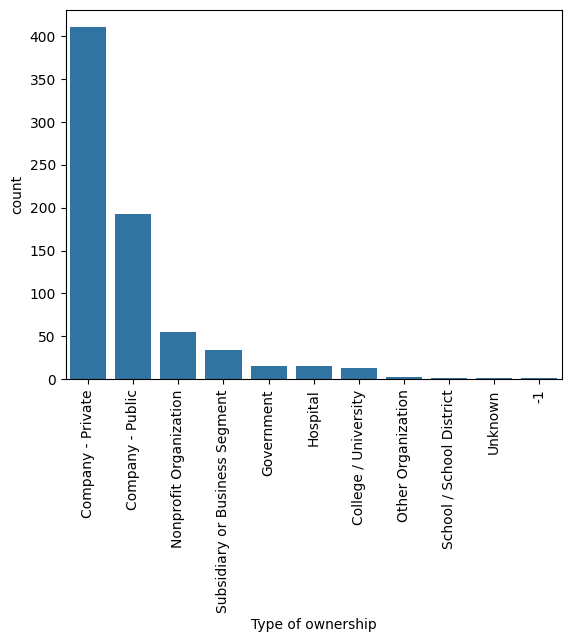

graph for Industry: total = 60


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


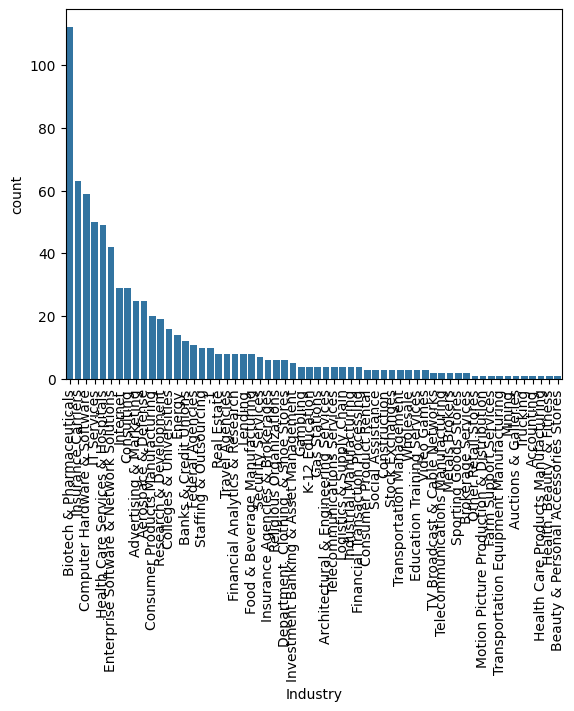

graph for Sector: total = 25


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


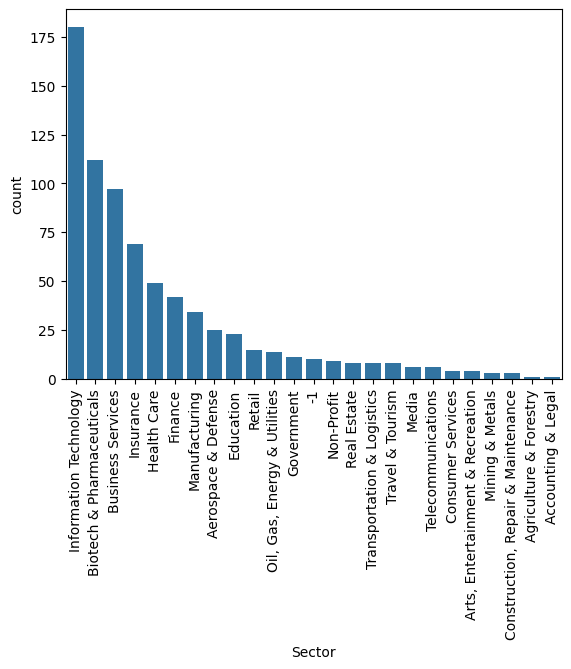

graph for Revenue: total = 14


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


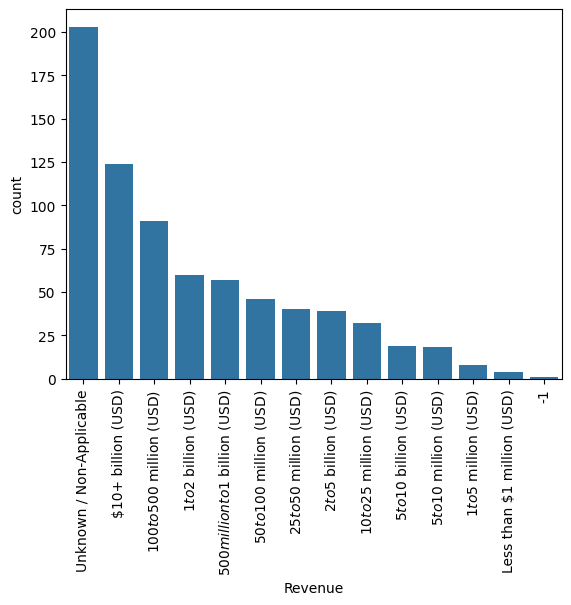

graph for company_txt: total = 343


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


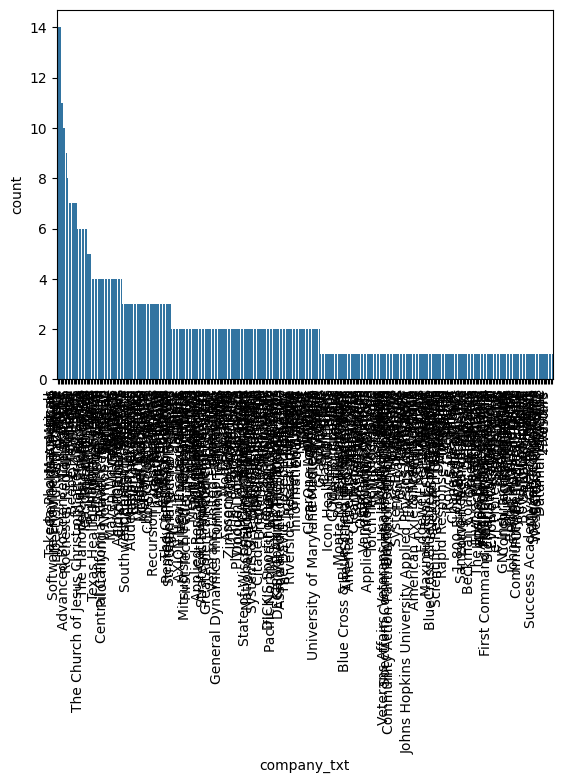

graph for job_state: total = 37


/tmp/ipython-input-2042905890.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


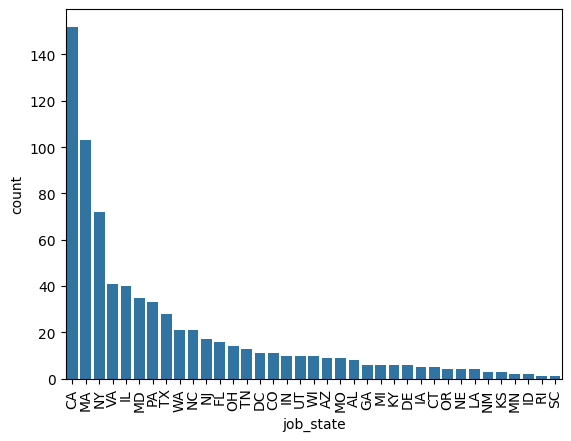

In [90]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


/tmp/ipython-input-3160879759.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


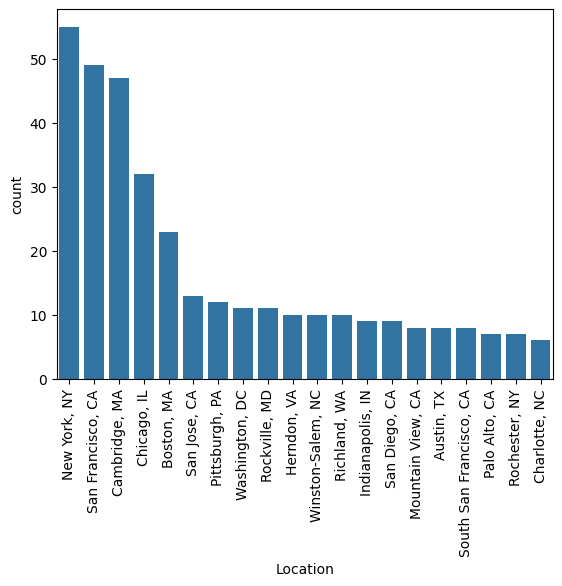

graph for Headquarters: total = 20


/tmp/ipython-input-3160879759.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


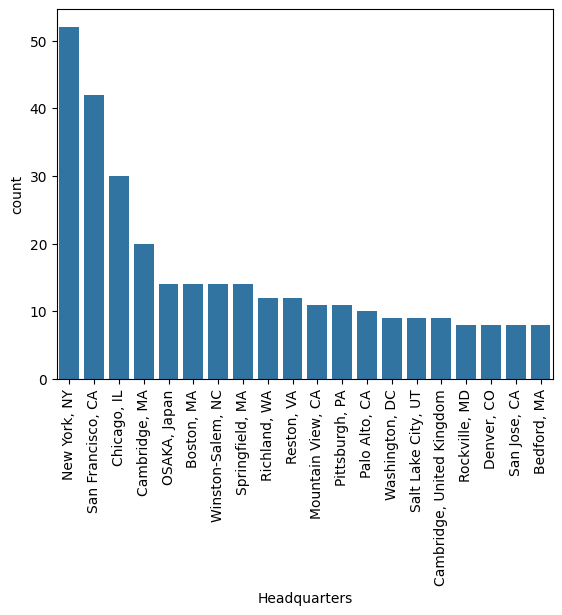

graph for company_txt: total = 20


/tmp/ipython-input-3160879759.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


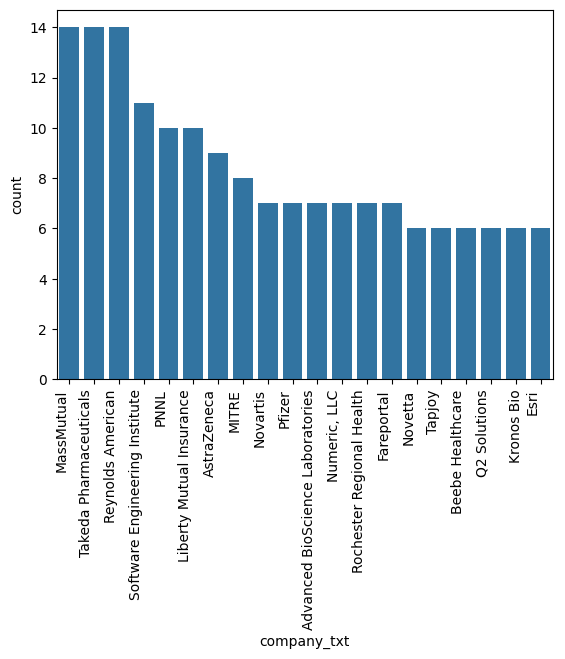

In [91]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [92]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')


,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [93]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')


avg_salary
job_simp       seniority            
analyst        junior      53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [94]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [95]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [96]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)


avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [97]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)


,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [100]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'r_studio_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','avg_salary']]

In [107]:
for i in df_pivots.columns:
    if i != 'avg_salary':
        print(i)
        print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [108]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')


python_yn,0
Revenue,
$1 to $2 billion (USD),60
$1 to $5 million (USD),8
$10 to $25 million (USD),32
$10+ billion (USD),124
$100 to $500 million (USD),91
$2 to $5 billion (USD),39
$25 to $50 million (USD),40
$5 to $10 billion (USD),19
$5 to $10 million (USD),18


In [105]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


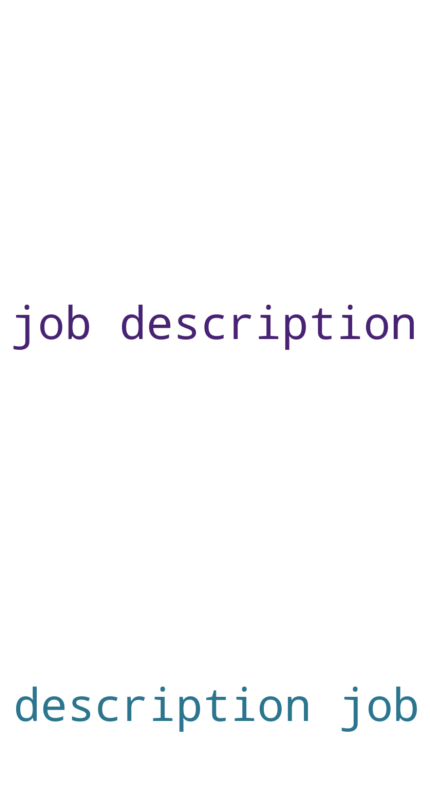

In [113]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()